In [1]:
# Run this cell first. This import should ideally
# happen automatically in our final setup.
from dstaster import * 

As before, we first load our dataset.

In [2]:
collection = pd.read_csv("../tate/paintings.csv", index_col=0)
collection.head() # Returns the first five rows

,artist,title,year,groundtruth,height,width
T13896,John Constable,Salisbury Cathedral from the Meadows,1831,L,1537,1920
T05010,Pablo Picasso,Weeping Woman,1937,O,608,500
N05915,Pablo Picasso,Bust of a Woman,1909,P,727,600
N00530,Joseph Mallord William Turner,Snow Storm - Steam-Boat off a Harbour’s Mouth,1842,L,914,1219
T00598,Richard Dadd,The Fairy Feller’s Master-Stroke,1855,O,540,394


<h2>Histograms</h2>

Let's say we would like to learn more about the 'year' column in our dataset. As we saw in the previous notebook, we can access the column and compute various statistics:

In [3]:
collection['year'].describe()

count    2158.000000
mean     1873.828082
std        76.739168
min      1594.000000
25%      1824.000000
50%      1889.500000
75%      1934.000000
max      2017.000000
Name: year, dtype: float64

However, each statistic is by design a very start simplification of the whole dataset. Sometimes, we simply have to <em>look</em> at the data. We already talked about histograms plots. Before we go into details of how we can use `pandas` and `matplotlib`, let us recall the basic ingredients of a histogram plot: a histogram divides the possible range of values into <em>bins</em>. For each bin, we count how many values fall into its range and then draw a rectangle on top of the bin whose height corresponds to this count and whose width covers the range of the bin.

The width of the bins determines the granularity at which we look at our data. If the width is very small, we have very little aggregation which creates an often very noisy plot. If the width is very high, we aggregate a lot of data and run the risk of oversimplifying. 


If you run the following cell you will be able to adjust
the bin width of a histogram plot using a slider. Change the value and see how it affects the shape of the resulting 
distribution.

<div class="note">We have hidden the source code for this part since it contains a lot of advanced features. If you are curious, you can have a look by pressing the 'Show code' button below it.</div>

In [4]:
from ipywidgets import *
import ipywidgets as widgets

try:
    # Tests a) that the variable is defined and b) that it's not None
    if collection is None: 
        raise NameError
except NameError:
    error("<code>collection</code> undefined.",
          "Did you run the code cells above?")

def plot_hist(bin_size):
    fig, ax = plt.subplots(dpi=300, figsize=(7,3.5))
    ax.hist(collection['year'], bins=range(1550,2051,bin_size), color=colors['blue'])
    ax.set_title('Number of paintings in Tate collection')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of paintings')
    
config = {
    'continuous_update': False,
    'min': 1,
    'value': 10,
    'max': 100
}

layout = {
    'width': '70%',
}

slider = widgets.IntSlider(**config, layout=layout, description="Bin size")
interact(plot_hist, bin_size=slider)

pass

interactive(children=(IntSlider(value=10, continuous_update=False, description='Bin size', layout=Layout(width…

<div class="task">
    <div class="no">1</div>
    <div class="text">
        Use the interactive plot above to look at the distribution
        for bin width 5, 25 and 100. For each width, count how
        many peaks (point where the plot goes up and then down) 
        the distribution has. Which answer do you think is the &lsquo;correct&rsquo; answer? Discuss with your peers!
    </div>
</div>

<h2>Plotting with <code>matplotlib</code></h2>

Matplotlib is a powerful plotting library which allows us to
generate many kinds of visualizations using Python code. Before we see how this plotting works, we need to learn a little bit about the terminology which this library uses.

The following graphic contains labels for all important elements of a Matplotlib plot. Importantly, a <em>figure</em> describes a single Matplotlib output which can contain any number of plots. Each plot is represented by its <em>axes</em> which represent a coordinate system in which can draw.

<img style="margin-top:-ex" src="images/matplotlib.png"/>

Most of the action happens with the axes object. We only need access to the figure object for high-level layout and to write the plot to a file. Let us generate a plot similar to the image above and see how the code builds up the plot step by step.

To begin, we need to tell the Matplotlib library (which we import under the name `plt`) that we want to create new figure. This is done using the `.subplots()` method which creates a figure and any number of axes (by default just one) and returns these objects.

Jupyter notebook has some built-in magic which automatically displays our plot directly in the output of the cell, so if you run the code below you should see an empty plot.

<div class="note">
    We additionally pass two parameters to <code>subplots</code>
    which control the shape of the figure (<code>figsize</code>) 
    and the scale at which it is drawn on your screen (<code>dpi</code>). If the text in the plot appears to small on your screen, try increasing the dpi value to 300.
</div>

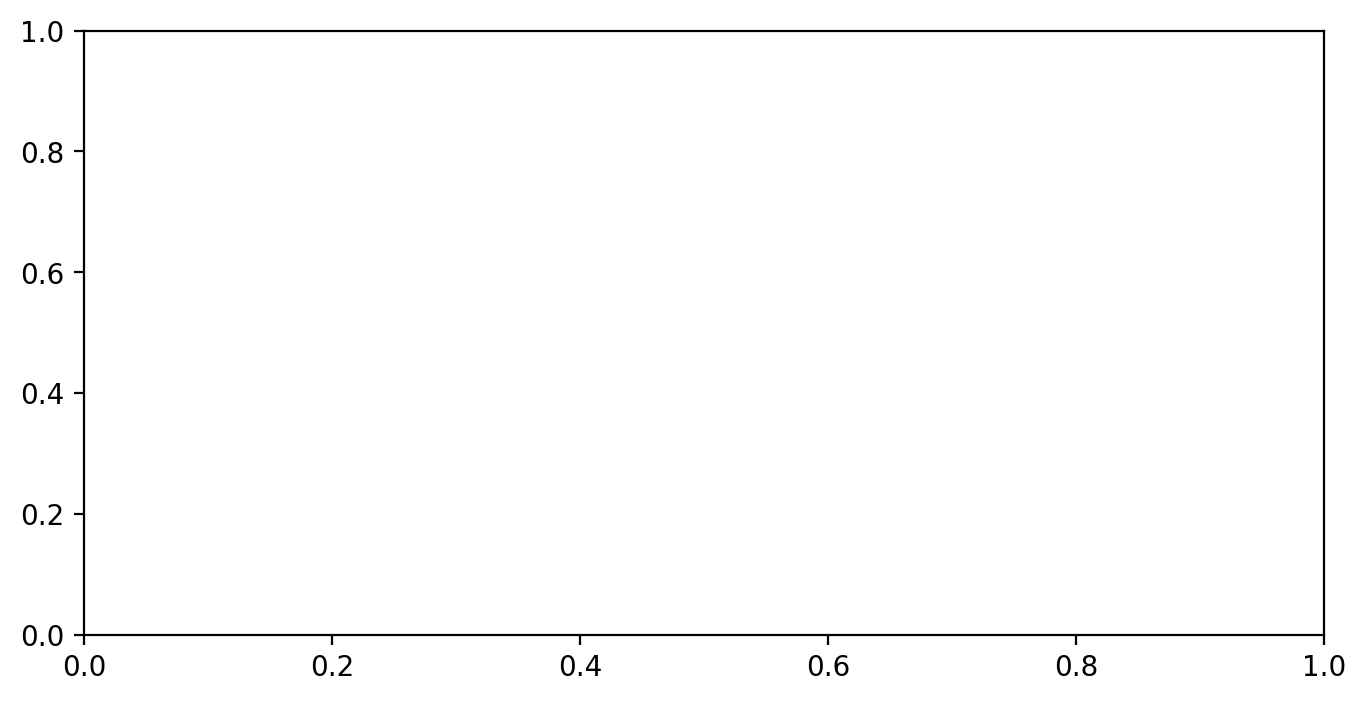

In [30]:
fig, ax = plt.subplots(dpi=200, figsize=(8,4))

Once we have the axes object `ax` we can use `.scatter()` to draw datapoints with given x and y values. Instead of accepting pairs of coordinates (x,y), most methods in matplotlib need one list with all x-values and one list with all y-values. 

Plotting points [(0, 0), (1, 1), (2, 4), (3, 9), (4, 16)]


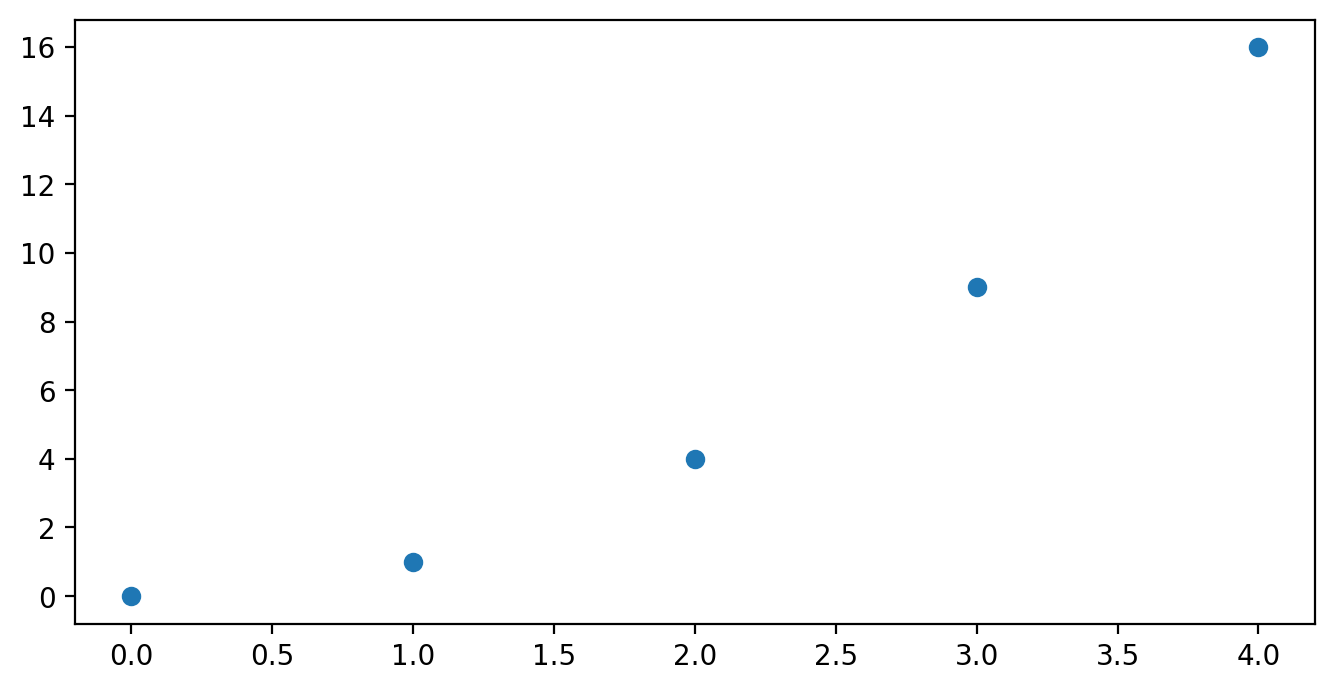

In [42]:
xs = [0, 1, 2, 3, 4]  # x values
ys = [0, 1, 4, 9, 16] # y values

print("Plotting points", list(zip(xs,ys)))

fig, ax = plt.subplots(dpi=200, figsize=(8,4))
ax.scatter(xs, ys)

pass 

We can draw more than one plot for each axes, even of different types. The following first uses `.scatter()` to draw individual points and then `.plot()` to draw a sequence of lines that connect those point. 

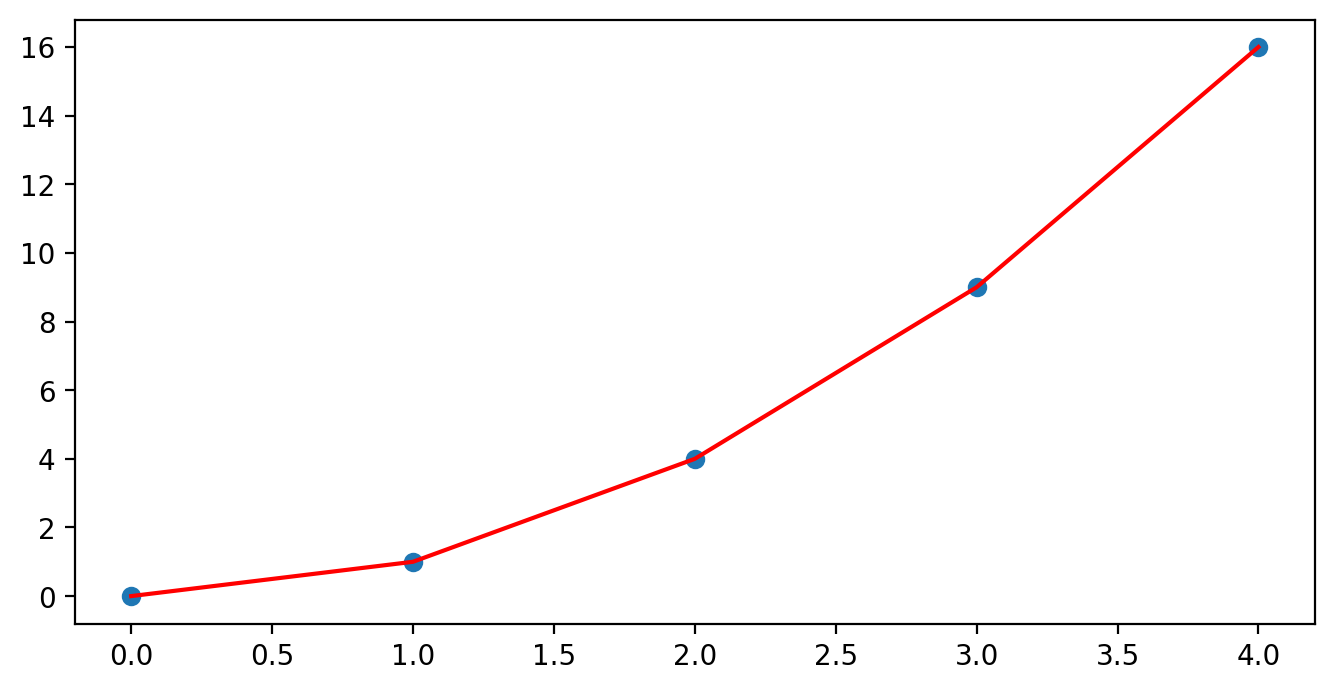

In [48]:
xs = [0, 1, 2, 3, 4]  # x values
ys = [0, 1, 4, 9, 16] # y values

fig, ax = plt.subplots(dpi=200, figsize=(8,4))
ax.scatter(xs, ys)
ax.plot(xs, ys, color='red')

pass 

Drawing a complete plot then looks something like this: we create a figure/axes object, we use the axes object to plot our data and then we add annotations like a legend and axes labels. This all happens in the following cell:

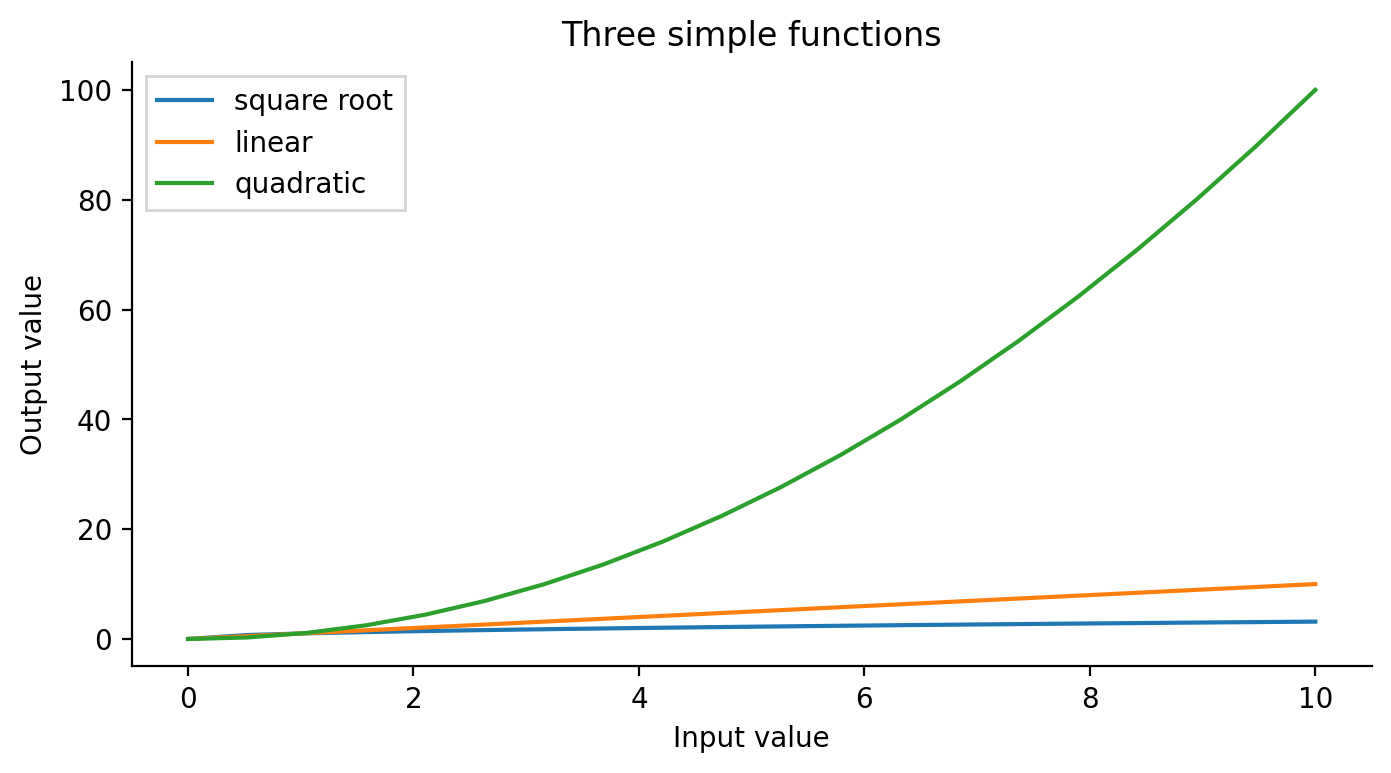

In [73]:
# Create values. This uses some numpy magic which we haven't 
# discussed yet.
xs = np.linspace(0, 10, 20)   # x-values from 0 to 10
ys_root = xs**.5 
ys_lin = 1*xs
ys_quad = xs**2

# Create figure, axes object
fig, ax = plt.subplots(dpi=200, figsize=(8,4))

# Plot functions
ax.plot(xs, ys_root, label='square root')
ax.plot(xs, ys_lin, label='linear')
ax.plot(xs, ys_quad, label='quadratic')

# Display legend
ax.legend()

ax.set_title('Three simple functions')
ax.set_xlabel('Input value')
ax.set_ylabel('Output value')

# Remove right and top spine. This is just personal preference!
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

pass 

<h3>Back to histograms</h3>

Let's put our knowledge to the test! and create histogram of the &lsquo;width&rsquo; column. 

<div class="task">
    <div class="no">2</div>
    <div class="text">Use Matplotlib to plot 
        a histogrom of the &lsquo;width&rsquo; column of
        the <code>collection</code> DataFrame</div> in
        the cell below.
</div>

<ul>
    <li>The </li>
</ul>

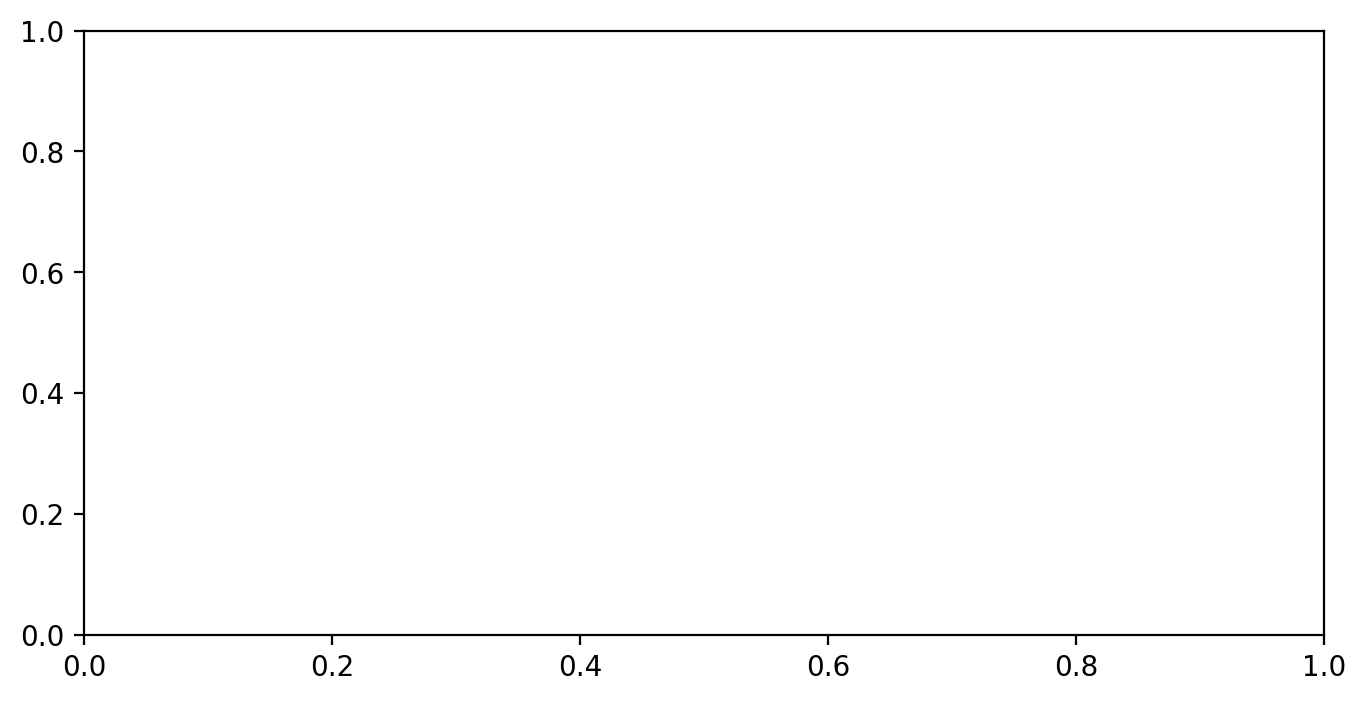

In [74]:
# Create figure, axes object
fig, ax = plt.subplots(dpi=200, figsize=(8,4))

# -------------------------------------------------
# Delete these lines and write your own code here!
# -------------------------------------------------

pass 

<h2>Your first matplotlib plot</h2>

Let's put the things we learnt about pandas DataFrames and 

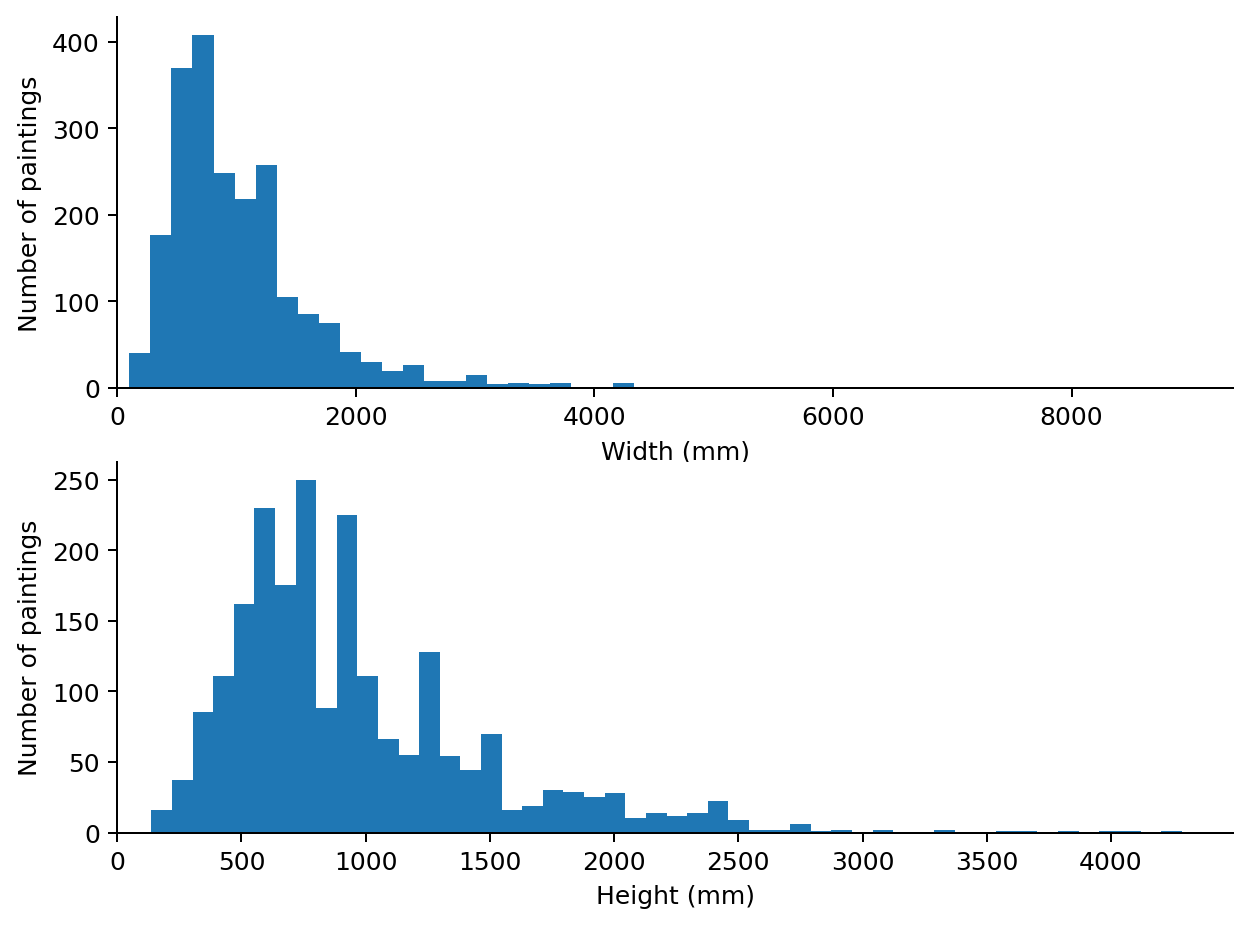

In [70]:
fig, axes = plt.subplots(2, 1, dpi=180, figsize=(8,6))

ax1, ax2 = axes
ax1.hist(collection['width'], bins=50)
ax2.hist(collection['height'], bins=50)
ax1.set_ylabel("Number of paintings")
ax2.set_ylabel("Number of paintings")
ax1.set_xlabel("Width (mm)")
ax2.set_xlabel("Height (mm)")

# ax1.set_xticks(range(0,8001,1000))
# ax1.set_xticks(range(0,8001,500), minor=True)

# ax2.set_xticks(range(0,4001,1000))
# ax2.set_xticks(range(0,4001,500), minor=True)

ax1.set_xlim(0)
ax2.set_xlim(0)

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


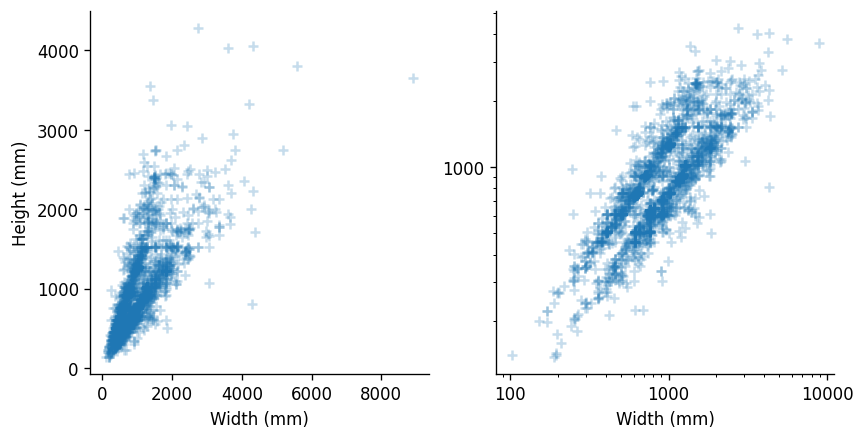

In [6]:
from matplotlib.ticker import ScalarFormatter

fig, axes = plt.subplots(1, 2, dpi=120, figsize=(8,4))

ax1, ax2 = axes

ax1.scatter(collection['width'], collection['height'], marker='+', alpha=.25)
ax2.scatter(collection['width'], collection['height'], marker='+', alpha=.25)

ax1.set_xlabel('Width (mm)')
ax1.set_ylabel('Height (mm)')
ax2.set_xlabel('Width (mm)')
# ax1.set_ylabel('Height (mm)')

ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.xaxis.set_major_formatter(ScalarFormatter())
ax2.yaxis.set_major_formatter(ScalarFormatter())

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
